In [178]:
import numpy as np
from skimage import measure
from sklearn.metrics import pairwise_distances_argmin
from skimage import color
from sklearn import cluster
from sklearn import metrics
import cv2
import matplotlib.pyplot as plt

In [179]:
def quantize(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))
    print("K-Means starting")
    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(reshaped_raster)
    palette = model.cluster_centers_
    print("K-Means ended")
    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))
    
    
    return quantized_raster.astype("uint8")

In [185]:
raster = cv2.imread("img/peppers.png")


In [186]:
raster16 = quantize(raster,16)
raster32 = quantize(raster,32)
raster64 = quantize(raster,64)
raster128 = quantize(raster,128)

K-Means starting
K-Means ended
K-Means starting
K-Means ended
K-Means starting
K-Means ended
K-Means starting
K-Means ended


In [187]:
a = np.zeros(5)

In [188]:
s =  measure.compare_ssim(raster, raster,multichannel=True)
print(s)
a[4] = s

1.0


In [189]:
s =  measure.compare_ssim(raster, raster128,multichannel=True)
print(s)
a[3] = s

0.8925570556309185


In [190]:
s =  measure.compare_ssim(raster, raster64,multichannel=True)
print(s)
a[2] = s

0.8479639686873287


In [191]:
s =  measure.compare_ssim(raster, raster32,multichannel=True)
print(s)
a[1] = s

0.7945513919397827


In [192]:
s =  measure.compare_ssim(raster, raster16,multichannel=True)
print(s)
a[0] = s

0.736243987535004


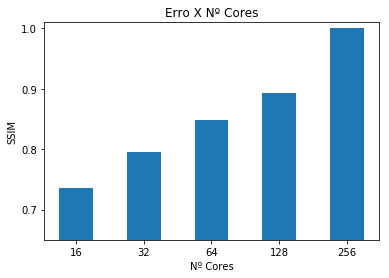

In [194]:
fig, ax = plt.subplots()
ax.bar([x for x in range(len(a))],a,width=.5)
plt.yticks([.7,.8,.9,0,1])
plt.ylim([.65,1.01])
ax.set_xticklabels([0,16,32,64,128,256])
plt.xlabel("Nº Cores")
plt.ylabel("SSIM")
plt.title("Erro X Nº Cores")
plt.show()
fig.savefig('res/peppers.png', dpi=900)

In [195]:
cv2.imwrite("res/peppers16.png",raster16)
cv2.imwrite("res/peppers32.png",raster32)
cv2.imwrite("res/peppers64.png",raster64)
cv2.imwrite("res/peppers128.png",raster128)

True